# Quickstart: Target x Survey

learn how to merge target inside a survey and simulate a dataset (observed version of target's data)

In [1]:
from skysurvey import survey, target

/Users/rigault/miniforge3/lib/python3.9/site-packages/ztfquery-1.19.0-py3.9.egg/ztfquery/utils/tools.py:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),


Following what we learned in Quickstart: target, let's create a SNeIa dataset of 5 000 targets

### Target | data given by nature

In [2]:
%%time
snia = target.SNeIa.from_draw(500)

CPU times: user 106 ms, sys: 9.2 ms, total: 115 ms
Wall time: 114 ms


let's check when "nature started"

In [3]:
starting_date = snia.data["t0"].min()-50 # 50 days before the first target, no need to simulate a survey before that

### Survey | What has been observed when and how. Here ZTF case

In [4]:
%%time
ztf = survey.ZTF.from_random(size=365*2*500, # number of observation  2 years, 500 per day, small for the doc
                     bands=["ztfg","ztfr","ztfi"], # band to observed
                     mjd_range=[starting_date, starting_date+365*4], # timerange of observation
                     skynoise_range=[10,20], # sky noise
                     )

CPU times: user 376 ms, sys: 40.6 ms, total: 416 ms
Wall time: 418 ms


### Target in Survey | let's check which target belongs to which field.

This is particularly optiomized thanks to a combination of shapely, pandas and geopandas

In [5]:
%%time
fieldid_of_targets = ztf.radec_to_fieldid(*snia.data[["ra","dec"]].values.T)

CPU times: user 114 ms, sys: 3.68 ms, total: 117 ms
Wall time: 121 ms


In [6]:
fieldid_of_targets

index_radec
0      [1850, 1822, 818, 1849]
1                  [290, 1332]
2                  [1645, 648]
3                  [1306, 314]
4            [1741, 1740, 742]
                ...           
495                [1680, 635]
496                [1325, 333]
497                [762, 1798]
498                [602, 1598]
499                [351, 1343]
Name: fieldid, Length: 498, dtype: object

### DataSet | The object that exploite the target x survey combination.

In [7]:
from skysurvey import DataSet

this not only match then SN with the target but already simulate the obseving point. 

In [8]:
%%time
dset = DataSet.from_targets_and_survey(snia, ztf)

CPU times: user 2.83 s, sys: 117 ms, total: 2.94 s
Wall time: 2.95 s


In [9]:
dset.data

fieldid          time  band       flux    fluxerr    zp zpsys
0   0       1850  59103.746445  ztfi  18.828721  15.363310  25.0    ab
    1       1850  59124.039846  ztfi  19.057347  15.473821  25.0    ab
    2       1850  59146.449039  ztfi  52.044695  15.141607  25.0    ab
    3       1850  59146.647904  ztfi  28.543276  13.438131  25.0    ab
    4       1850  59161.834208  ztfg  39.857087  16.792113  25.0    ab
...          ...           ...   ...        ...        ...   ...   ...
498 224     1598  60545.805442  ztfi   8.001690  10.051593  25.0    ab
    225     1598  60546.562207  ztfr -17.922059  15.900517  25.0    ab
    226     1598  60550.372139  ztfg  13.451672  17.007259  25.0    ab
    227     1598  60551.245558  ztfr  -5.831162  14.729821  25.0    ab
    228     1598  60558.744831  ztfg -10.270831  11.625389  25.0    ab

[233019 rows x 7 columns]

z         0.138500
x1        1.740000
c        -0.068000
t0    59149.420957
x0        0.000328
Name: 90, dtype: float64

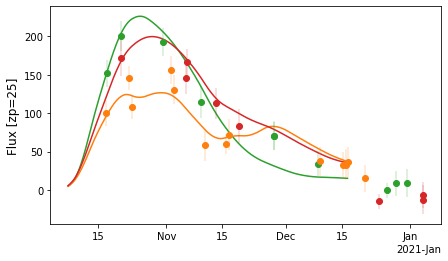

In [10]:
_ = dset.show_target_lightcurve(index=90, phase_window=[-30, 70])
dset.targets.get_template_parameters(index=90)

In [11]:
%%time
dset.get_ndetection(per_band=True)

CPU times: user 52.1 ms, sys: 17.6 ms, total: 69.7 ms
Wall time: 68.7 ms


level_0  band
0        ztfg    0
         ztfi    0
         ztfr    0
1        ztfg    0
         ztfi    2
                ..
498      ztfi    6
         ztfr    9
499      ztfg    0
         ztfi    0
         ztfr    1
Name: detected, Length: 1494, dtype: int64